In [193]:
import torch
import torch.nn as nn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
X,y = load_diabetes(return_X_y=True,as_frame=True)
data_set = pd.concat([X, y], axis=1)
data_set.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<Axes: xlabel='s5', ylabel='target'>

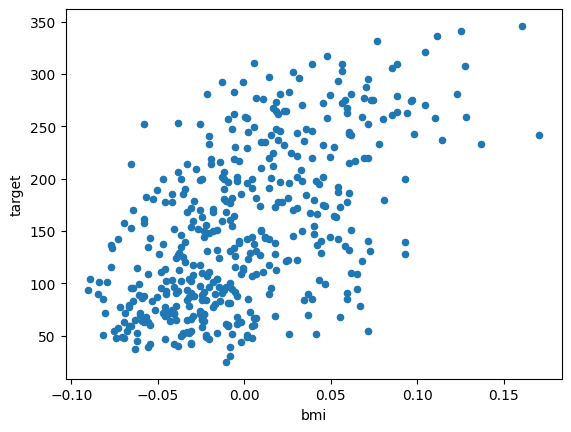

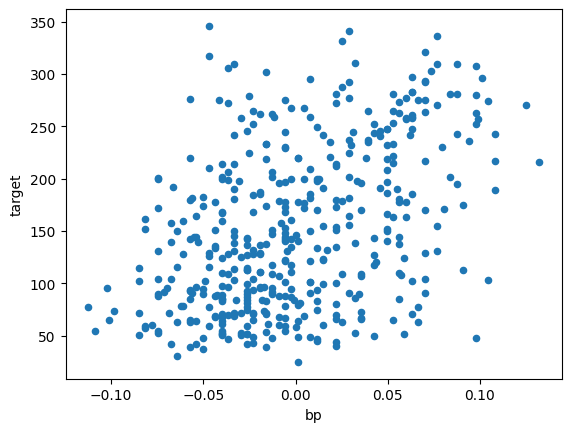

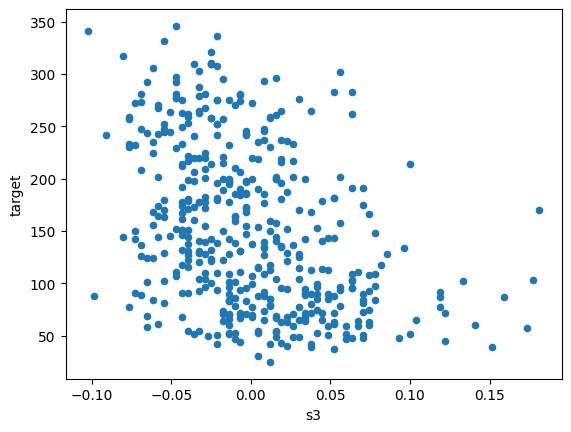

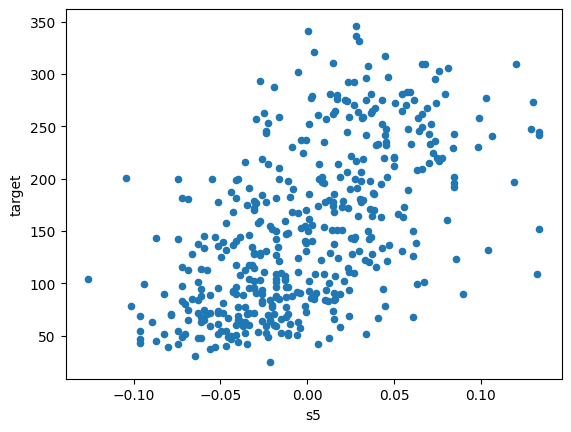

In [169]:
# Most impacting features
data_set.plot.scatter(x='bmi',y='target')
data_set.plot.scatter(x='bp',y='target')
data_set.plot.scatter(x='s3',y='target')
data_set.plot.scatter(x='s5',y='target')

In [170]:
from numpy import dtype


impact_features = ['bmi','bp','s3','s5']

X = data_set[impact_features]
y = data_set['target']
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).unsqueeze(1).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).unsqueeze(1).type(torch.float32)


In [171]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [172]:
model = LinearRegression()

In [176]:
learning_rate = 0.01
epochs=100000

loss_fn= nn.L1Loss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(epochs):
    predictions = model(X_train)
    loss = loss_fn(predictions, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()}")

Epoch: 0 | Loss: 65.77774810791016
Epoch: 5 | Loss: 65.77733612060547
Epoch: 10 | Loss: 65.77692413330078
Epoch: 15 | Loss: 65.7765121459961
Epoch: 20 | Loss: 65.77610778808594
Epoch: 25 | Loss: 65.77568817138672
Epoch: 30 | Loss: 65.77527618408203
Epoch: 35 | Loss: 65.77486419677734
Epoch: 40 | Loss: 65.77445983886719
Epoch: 45 | Loss: 65.7740478515625
Epoch: 50 | Loss: 65.77363586425781
Epoch: 55 | Loss: 65.77322387695312
Epoch: 60 | Loss: 65.77281188964844
Epoch: 65 | Loss: 65.77240753173828
Epoch: 70 | Loss: 65.7719955444336
Epoch: 75 | Loss: 65.77157592773438
Epoch: 80 | Loss: 65.77117156982422
Epoch: 85 | Loss: 65.77075958251953
Epoch: 90 | Loss: 65.77034759521484
Epoch: 95 | Loss: 65.76993560791016
Epoch: 100 | Loss: 65.76952362060547
Epoch: 105 | Loss: 65.76911163330078
Epoch: 110 | Loss: 65.7686996459961
Epoch: 115 | Loss: 65.76829528808594
Epoch: 120 | Loss: 65.76787567138672
Epoch: 125 | Loss: 65.76746368408203
Epoch: 130 | Loss: 65.7670669555664
Epoch: 135 | Loss: 65.766654

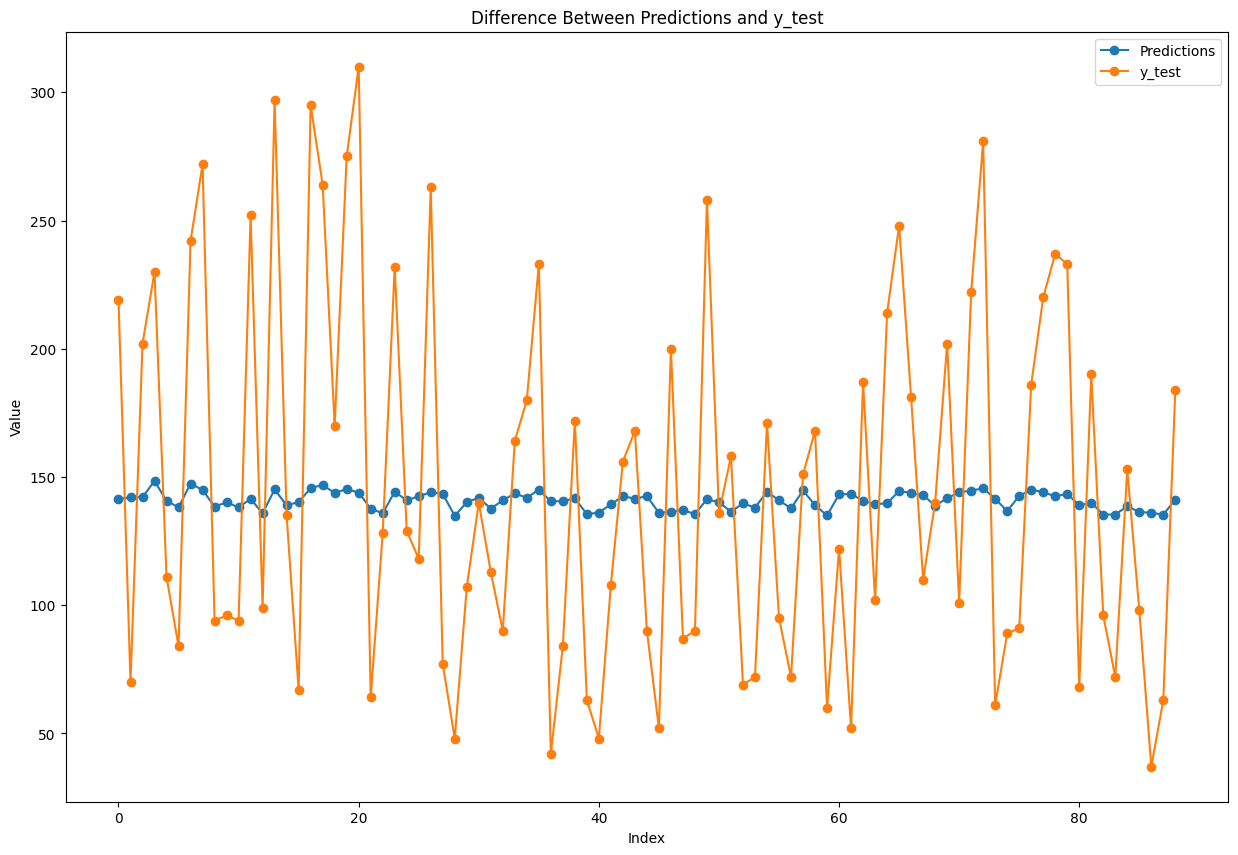

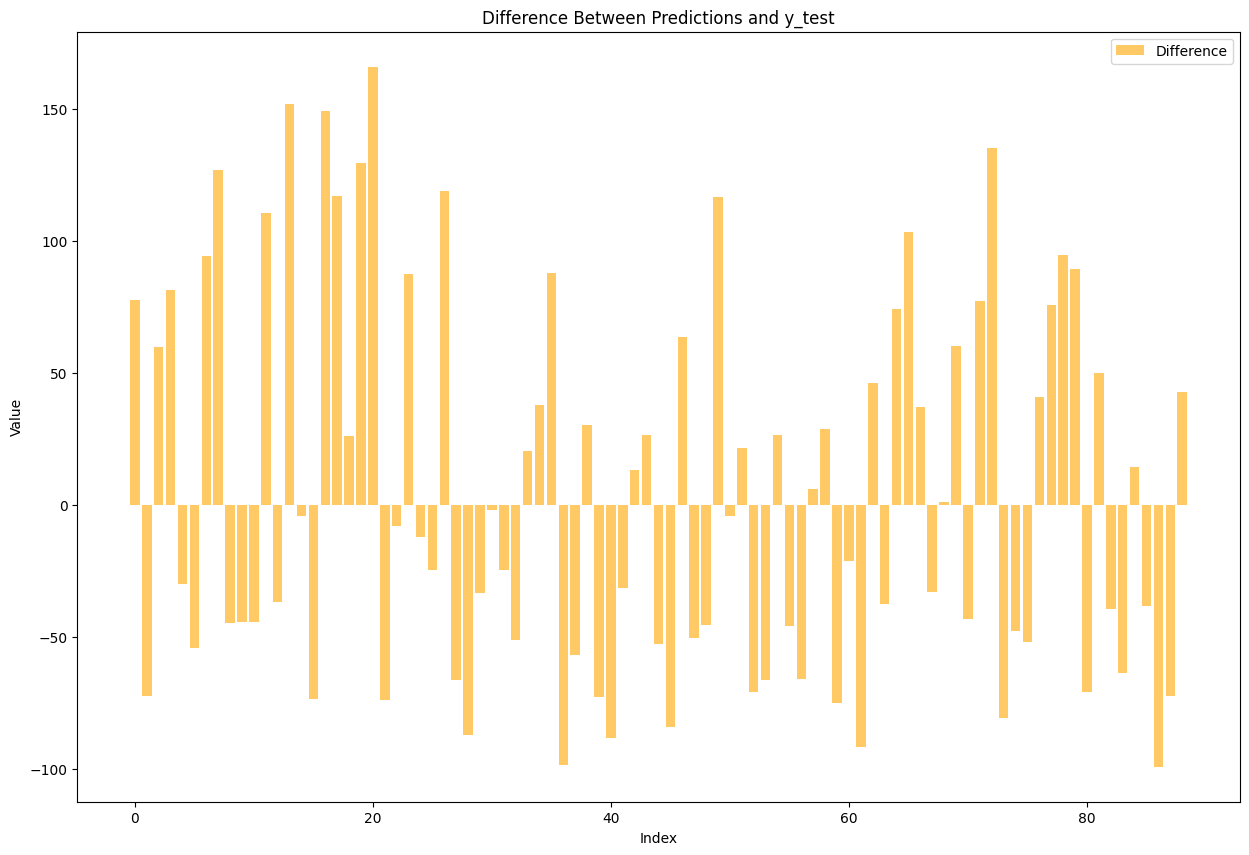

In [202]:
model.eval()
with torch.inference_mode():
    predictions = model(X_test)


# Convert tensors to numpy arrays
predictions_np = predictions.numpy().flatten()
y_test_np = y_test.numpy().flatten()

# Calculate the difference
difference = y_test_np - predictions_np

# Plot the arrays and their difference
plt.figure(figsize=(15, 10))

# Plot predictions
plt.plot(predictions_np, label='Predictions', marker='o')

# Plot y_test
plt.plot(y_test_np, label='y_test', marker='o')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Difference Between Predictions and y_test")
plt.legend()

# Show the plot
plt.show()

# Plot the difference
indices = np.arange(len(predictions_np))
plt.figure(figsize=(15, 10))
plt.ylabel('Value')
plt.xlabel('Index')
plt.title('Difference Between Predictions and y_test')
plt.bar(indices, difference, label='Difference', color='orange', alpha=0.6)

# Add labels and title
plt.legend()

# Show the plot
plt.show()